# Artificial neural network

Inspired by biological neural networks, perceptron was created in the late 1960s. Since then, a generalized form of neural network has gain popularity, and new structures were created for different proposes.

The core idea is to use an artificial neural network to approximate a function rather than creating a function through experiments and/or deriving it.

Say we want to model kinetic energy. We might carry out a series of physical experiments and figure out the relationship between mass, speed, kinetic energy, and arrive at a function like:

$$ \text{kinetic energy} = \frac{1}{2} \text{mass} \cdot \text{speed}^2 $$

Say we want to model aerodynamics of an airplane, we might derive a function with known physical laws.

However, there might be somethings we want to model that is too complex to derive this way.

One approach to model such problems is artificial neural networks.

A function takes in an input and produce an output.

$f(x) = y$, where $f(\cdot)$ is the function, $x$ is the input, $y$ is the output.

A neural network is no different, it takes in an input and produces an output as well. However, rather than a formula like in the kinetic energy example, neural networks calculate the output with a network of neurons.

This is inspired by biological neural network which is a network formed by neurons. With each neuron taking in impulses from some neurons and decide whether to fire off an impulse to other neurons.

![bio_neuron.png](img/bio_neuron.png)

Retrieved from: https://simplebiologyy.blogspot.com/2014/08/conduction-of-nerve-impulse.html

Here is an example artificial neural network with input of size 2 and output of size 2. Meaning there are two input scalars and two output scalars. A scalar is just a number, e.g., $1.3$, or $\text{-}3.2$.

Usually, the input and output of a neural network is an array of scalars (vector).

![small_neural_network.png](img/3_layer_neural_network.png)

This is type of neural network is a fully connected feedforward network.

The grey cell represents the input values.

Each of the white cells ("hidden 1", "output 1", etc.) are a neuron.

These neurons are organized into layers. By convention, the layer between input layer and output layer is called a hidden layer. There can be multiple hidden layers in a network. 

The output of each cell is fed to the connected cell as their input.

To understand how the network as a whole, we need to know how the individual neurons work.

## Neuron

Let us start with a simplified neuron. This neuron takes the inputs and compute a weighted sum as the output.

![simple_neuron.png](img/simple_neuron.png)

In this case, there are three input connections. 

The three input values are: $0.5$, $3.1$, $\text{-}1.3$.

The weights for each of the inputs are: $\text{-}1.4$, $0.2$, $2.3$.

The output of the neuron is $\text{-}3.07$.

The output is the sum of each input multiplied by its weight.

$0.5 \times \text{-}1.4 + 3.1 \times 0.2 + \text{-}1.3 \times 2.3 = \text{-}3.07$

Complex systems tend to be [nonlinear](https://en.wikipedia.org/wiki/Nonlinear_system) in nature. For the neural network to model nonlinear system, some form of nonlinearity needs to be included.

For this reason, neuron includes an activation function. The weighted sum of the neuron is inputted into the activation function.

It is possible to have no activation function (or identity function as activation) for some layers. It is just some nonlinearity needs to be present in the network.

Identity function: $f(x) = x$

There are a variety of [activation functions](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6). A highly popular and useful one is the ReLU.

However, we will be using [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) for now.

$$\sigma(x) = \frac{1}{1+e^{\text{-}x}}$$
 
where $\sigma(\cdot)$ is the sigmoid function.

Plot of sigmoid:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

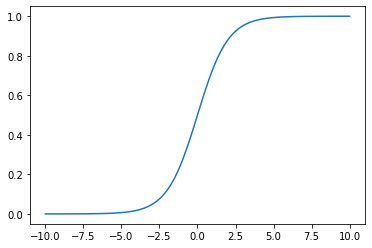

In [3]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

Here is the version of neuron with sigmoid activation function:

![full_neuron.png](img/full_neuron.png)

The inputs and weights are the same as the simplified neuron.

The only different is there is a sigmoid activation function. So the output is now 0.04.

$\sigma(\text{-}3.07) = 0.04$

In [4]:
sigmoid(-3.07)

0.04436182758915638

For three inputs, a neuron would look like:

![neuron.png](img/neuron.png)

Where x1, x2, x3 are the inputs, w1, w2 ,w3 are the weights, h(·) is a activation function, and y is the output.

The neuron takes the weighted sum of the inputs and pass it into an activation function.

The general formula for any input size is:

$n(\cdot)$ is the neuron function and $h(\cdot)$ is an activation function.

$n(x_1, x_2, \dots , x_n) = h(w_1 \times x_1 + w_2 \times x_2 + ... + w_n \times x_n)$

where $x_i$ are the inputs, and $w_i$ are the weights.

or

$n(\vec x) = h(\vec w \cdot \vec x)$

where $\vec x$ is the vector of $x_i$, and $\vec w$ is the vector of $w_i$.

## Fully connected feedforward neural network

In a fully connected feedforward network, all possible connections between any two layers are present. 

There will be one input layer and one output layer with any amount of hidden layers.

Here is a sample two layer network:

![2_layer_neural_network](img/2_layer_neural_network.png)

There are three inputs and two outputs.

Here is the three layer network shown at the start:

![3_layer_neural_network](img/3_layer_neural_network.png)

There are two inputs and two outputs with a hidden layer of size 3.

By the way, fully connect feedforward are often just referred as fully connected.

Recall the formula for a neuron is: $n(\vec x) = h(\vec x \cdot \vec w)$

From that the formula for fully connected layer can be derived.

Here is an fully connected layer with 2 inputs and 2 outputs.

![feed_forward.png](img/feed_forward.png)

The two inputs are $\text{x1}$ and $\text{x2}$.

The two outputs are $\text{y1}$ and $\text{y2}$.

The $h(\cdot)$ is the activation function (not shown in image).

Using the formula for neuron, the outputs should be:

$\text{y1} = h(\text{w11} \times \text{x1} + \text{w21} \times \text{x2})$

$\text{y2} = h(\text{w12} \times \text{x1} + \text{w22} \times \text{x2})$

Alternatively, we could use vector and matrix representations:

The inputs: $\vec x = (\text{x1}, \text{x2})$

the outputs: $\vec y = (\text{y1}, \text{y2})$

The weight matrix: $\mathbf W = \begin{bmatrix}\text{w11} & \text{w12}\\ \text{w21} & \text{w22} \end{bmatrix}$

Then it becomes:

$\vec y = h(\vec x \cdot \mathbf W)$

#### General form
Say $\text{ff}(\cdot)$ is the function of a fully connected layer, then:

$\text{ff}(\vec x) = h(\vec x \cdot \mathbf W)$

Where $\vec x$ is the input of the layer, and $\mathbf W$ is the weight matrix of all the input connections of the layer.

Note in this fully connected layer each neuron uses the same activation function $h(\cdot)$.

Some versions adds a bias for each neuron. Which results in:

$\text{ff}(\vec x) = h(\vec x \cdot \mathbf W + \vec b)$

where $\vec b$ is a vector of bias.

Bias is just a scalar to shift the function along the x-axis (input axis).

For example, $f(x)=x-1$ is shift to the left by one compared to $f(x)=x$. The scalar $1$ is the bias in the example.

A network of fully connected layers would have network function that is consist of nested $\text{ff}(\cdot)$.

For example, a two layer fully connected network function $N(\cdot)$ of:

$N(\vec x) = h_2(h_1(\vec x \cdot \mathbf W_1 + \vec b_1) \cdot \mathbf W_2 + \vec b_2)$


## Example of fully connected network

Now we know how neurons work and one way to build a network of them, we can use a simple neural network to model a system.

Let us create a model to classify iris flowers with the petal width and petal length of a flower.

That means given a set of width and length of petal, our model can guess what type of iris flower it is.

There are three types of iris flowers:

##### Iris setosa:

![Iris_setosa.jpg](img/Iris_setosa.jpg)

Retrieved and downscaled from: https://en.wikipedia.org/wiki/Iris_setosa#/media/File:Kosaciec_szczecinkowaty_Iris_setosa.jpg

##### Iris versicolor:

![Iris_versicolor.jpg](img/Iris_versicolor.jpg)

Retrieved and downscaled from: https://en.wikipedia.org/wiki/Iris_versicolor#/media/File:Blue_Flag,_Ottawa.jpg

##### Iris virginica:

![Iris_virginica.jpg](img/Iris_virginica.jpg)

Retrieved and downscaled from: https://en.wikipedia.org/wiki/Iris_virginica#/media/File:Iris_virginica_2.jpg

### Load the dataset

We will be using the [iris data set](https://archive.ics.uci.edu/ml/datasets/iris).

In [5]:
import os
import pandas as pd

data_path = os.path.join('data', 'iris.data')
dataset = pd.read_csv(data_path, names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class'])

Here is what the data look like:

In [6]:
dataset[:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


The "class" column is the type of flower.

The other four columns are the length and width of sepal and petal, these are the four features given in the dataset.

Out of the 4 features given, we are only going to use the petal length and petal width.

### Visualize the dataset

To visualize the dataset, we will be using seaborn.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

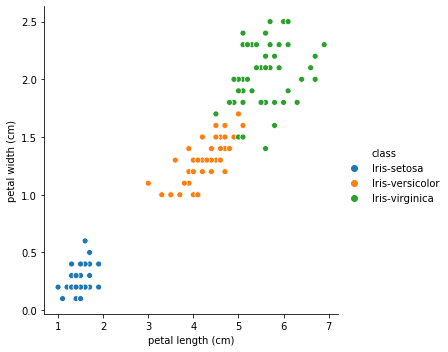

In [8]:
sns.relplot(x='petal length (cm)', y='petal width (cm)', hue='class', data=dataset)
plt.show()

The goal of our network is to determine which class a data point belongs to.

Given set of petal length and petal width, the network would output the class of the flower.

One way to see it is for the network to decide on some boundary for classification.

One possible decision boundary may look like:

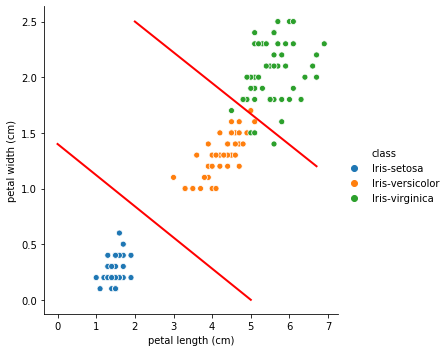

In [9]:
sns.relplot(x='petal length (cm)', y='petal width (cm)', hue='class', data=dataset)
plt.plot([5, 0], [0, 1.4], 'r', linewidth=2)
plt.plot([6.7, 2], [1.2, 2.5], 'r', linewidth=2)
plt.show()

### Structure of the fully connected network

A neural network takes scalars as inputs and output scalars.

It is easy to see how input petal length and petal width as they are both scalars.

But how to make the network output one of the three classes of flower?

One way is for the network to output three scalars, each representing a class. The class with the largest value will be the chosen class.

Since there are two inputs, the input layer will consist of two units. There are three outputs, so three neurons in output layer.

Now we decide on how many hidden layers and how many neurons in each layer. There are no hard and fast rules for choosing these. Often these parameters are chosen with trial and error.

We will be using a single hidden layer with 3 neurons.

With that our network would look like:

![small_iris_network.png](img/small_iris_network.png)

The first output would represent iris setosa. The second would be iris versicolor. And the third being iris virginica.

### Implementing fully connected network

Let us start by implementing fully connected layer.

In [10]:
class FullyConnected:
    
    def __init__(self, input_size, output_size, activation):
        # Init weight matrix to random values
        self.weight = np.random.rand(input_size, output_size)  
        self.activation = activation
        
    def run(self, x):
        x = x @ self.weight  # @ is the dot product operator in Python
        # Apply the activation function to each weighted sum
        x = self.activation(x)
        return x

This is an implementation of the general formula for a fully connected layer (without bias).

Note the weights are randomly chosen. Since we have not learned how to assign these weights.

Now, we can make the network with fully connected layers.

In [11]:
class IrisNetwork:
    
    def __init__(self):
        self.hidden = FullyConnected(2, 3, sigmoid)
        self.output = FullyConnected(3, 3, sigmoid)
        
    def run(self, x):
        x = self.hidden.run(x)
        x = self.output.run(x)
        return x

In [12]:
network = IrisNetwork()

With a network defined, we can test it with the data.

In [13]:
to_class = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}
i = 0

The data is the petal length and petal width 

In [14]:
data = dataset.loc[i, ['petal length (cm)', 'petal width (cm)']].to_numpy(dtype=np.float_)
print(data)

[1.4 0.2]


The target is correct output for the network. Which is the type of flower.

In [15]:
target = dataset.loc[i, ['class']].tolist()[0]
print(target)

Iris-setosa


We can now feed the network the input and the class represented with the largest output is chosen.

The network output:

In [16]:
y = network.run(data)
y

array([0.77957496, 0.75517361, 0.78954698])

The index of max in output:

In [17]:
c = np.argmax(y)
c

2

The class of max in output:

In [18]:
to_class[c]

'Iris-virginica'

Since the weights in the feedforward were randomly chosen, the output is random as well.

Now we learn how a fully connected network works, we can learn how to assign proper weights to model a given dataset.

In the next lesson, we will learn about backpropagation which is the most popular method for training a neural network.

### Practice:

#### Exercise 1:

Implement a fully connected with a input layer of size 4, 2 hidden layer of size 5, and a output layer of size 2.
Sigmoid is the activation function all hidden and output layers.


In [19]:
# code here

#### Exercise 2:

Input the vector $(0.4, -1.3, -32.3, 2.1)$ to the network.

Note the output will be random since the weights are random.

In [20]:
# code here

## Solutions:

In [21]:
# Solution to exercise 1
class Network:
    
    def __init__(self):
        self.hidden1 = FullyConnected(4, 5, sigmoid)
        self.hidden2 = FullyConnected(5, 5, sigmoid)
        self.output = FullyConnected(5, 2, sigmoid)
        
    def run(self, x):
        x = self.hidden1.run(x)
        x = self.hidden2.run(x)
        x = self.output.run(x)
        return x

In [22]:
# Solution to exercise 2
x = np.array([0.4, -1.3, -32.3, 2.1], dtype=np.float_)
network = Network()

network.run(x)

array([0.79984323, 0.73817321])